# Exploration of Weather Data

In [1]:
# Install the necessary packages directly within Jupyter
!pip install sqlalchemy pymysql pandas matplotlib seaborn
! pip install pandas

In [10]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database connection parameters
host = 'air-quality-db.c6jid8c0mhxf.us-east-1.rds.amazonaws.com'
port = 3306  # The default port for MySQL
user = 'admin'  # Replace with your actual username
password = 'aqdata.09'  # Consider managing this securely as mentioned
database = 'weather_data'

# Create a connection string using pymysql as the driver for MySQL
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create a database engine
engine = create_engine(connection_string)

In [3]:
# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()

In [16]:
# Query and merge data from each year's table
for year in range(2020, 2024):
    table_name = f'weather_{year}'
    query = f"SELECT *, {year} AS year FROM {table_name}"
    df = pd.read_sql(query, engine)
    
    # Convert 'Datum' column to datetime format
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Append the yearly data to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

In [6]:
# Fill missing 'Wert' values with 0
all_data['Wert'] = all_data['Wert'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963094 entries, 0 to 963093
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Datum      963094 non-null  datetime64[ns]
 1   Standort   963094 non-null  object        
 2   Parameter  963094 non-null  object        
 3   Intervall  963094 non-null  object        
 4   Einheit    963094 non-null  object        
 5   Wert       944060 non-null  float64       
 6   Status     963094 non-null  object        
 7   year       963094 non-null  int64         
 8   time       963094 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 66.1+ MB
None
                               Datum           Wert           year  \
count                         963094  944060.000000  963094.000000   
mean   2022-06-30 23:59:59.999999232     173.875292    2021.996756   
min              2020-01-01 00:00:00      -8.800000    2020.00000

In [25]:
# Select a subset of parameters for analysis
parameters_of_interest = ['T', 'Hr', 'p', 'WD', 'WVv']
data_filtered = all_data[all_data['Parameter'].isin(parameters_of_interest)]

# Pivot the data for time series analysis
pivoted_data = data_filtered.pivot_table(
    index='Datum', columns=['Parameter', 'Standort'], values='Wert', aggfunc='mean'
)


In [26]:
# Fill missing values in the pivoted data with 0
pivoted_data = pivoted_data.fillna(0)



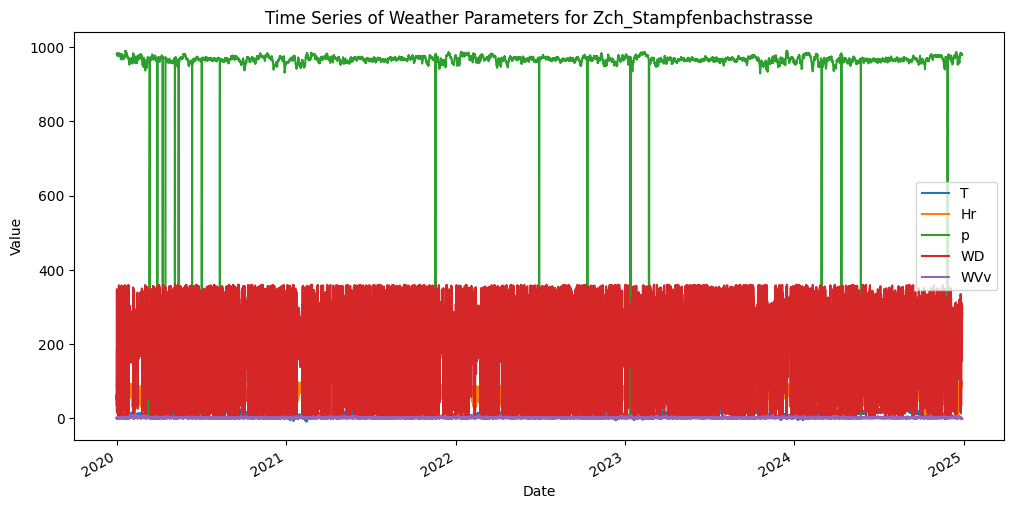

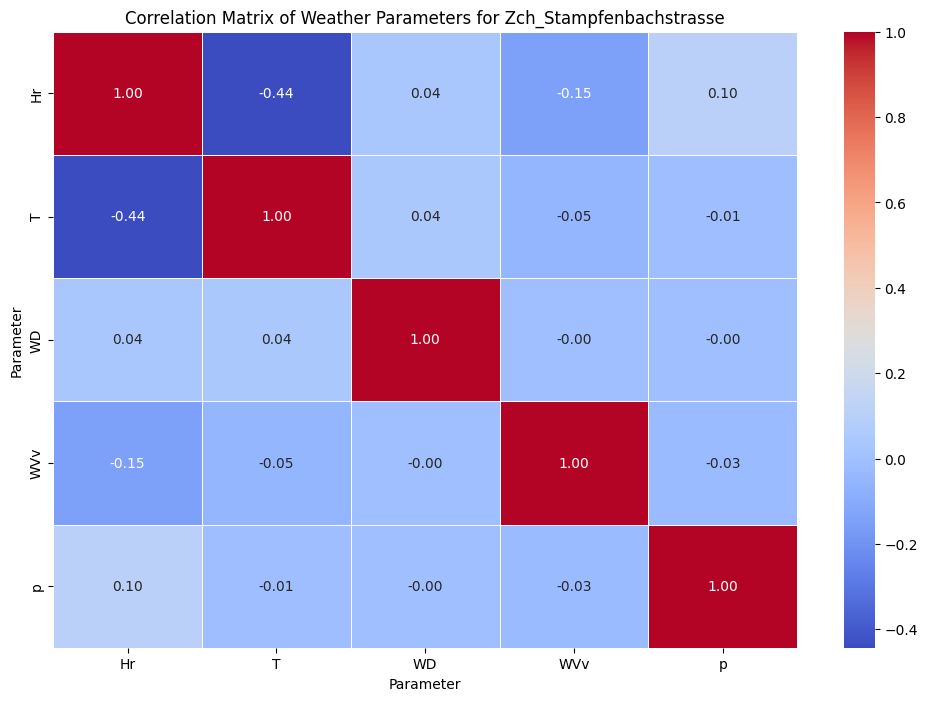

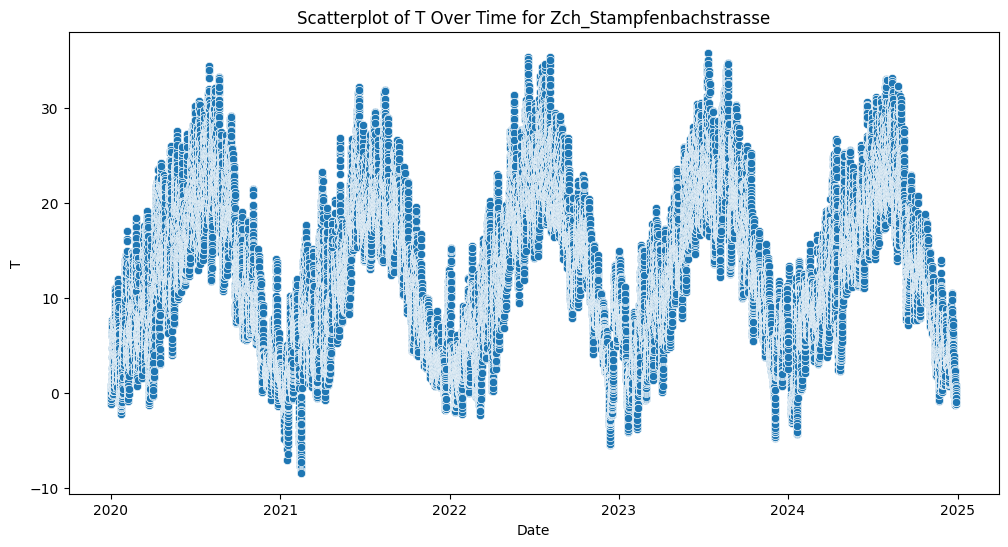

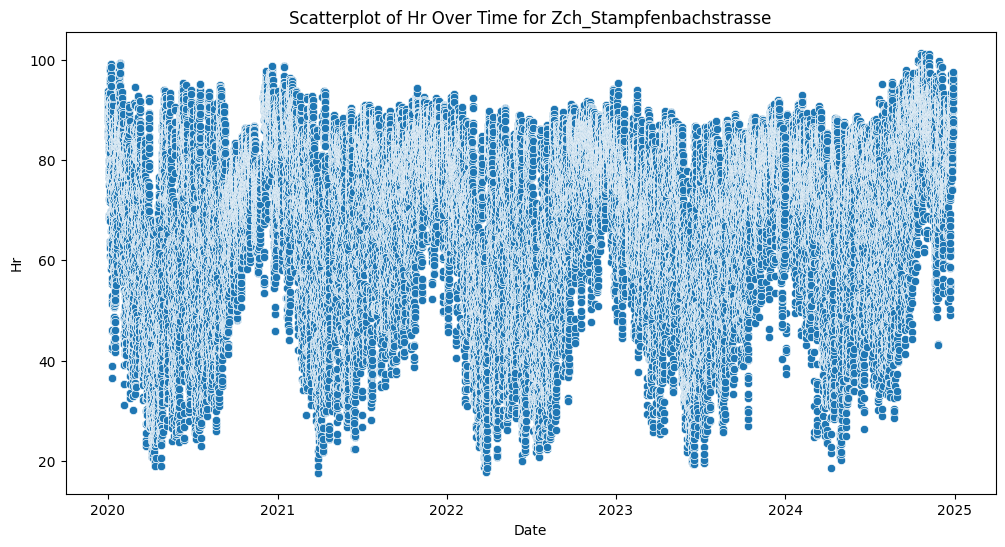

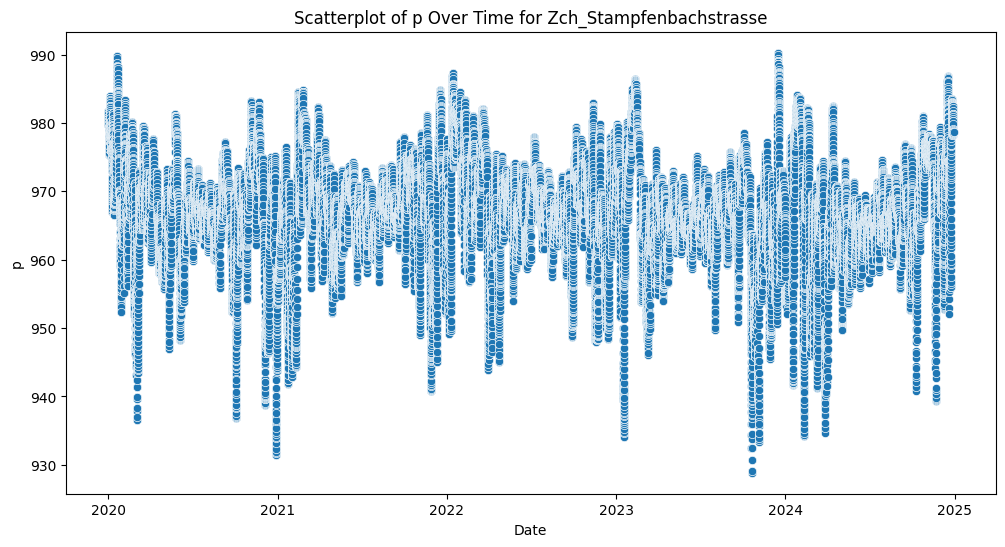

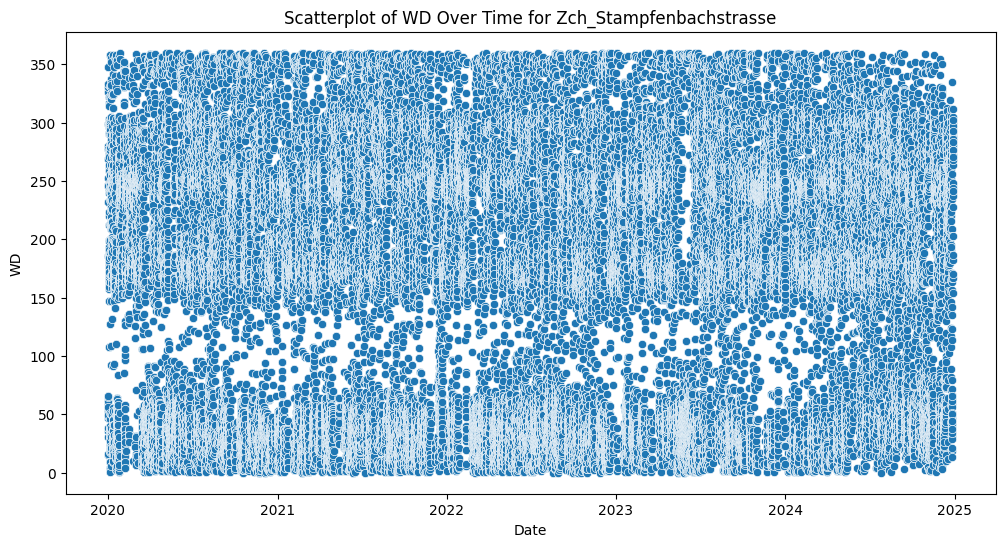

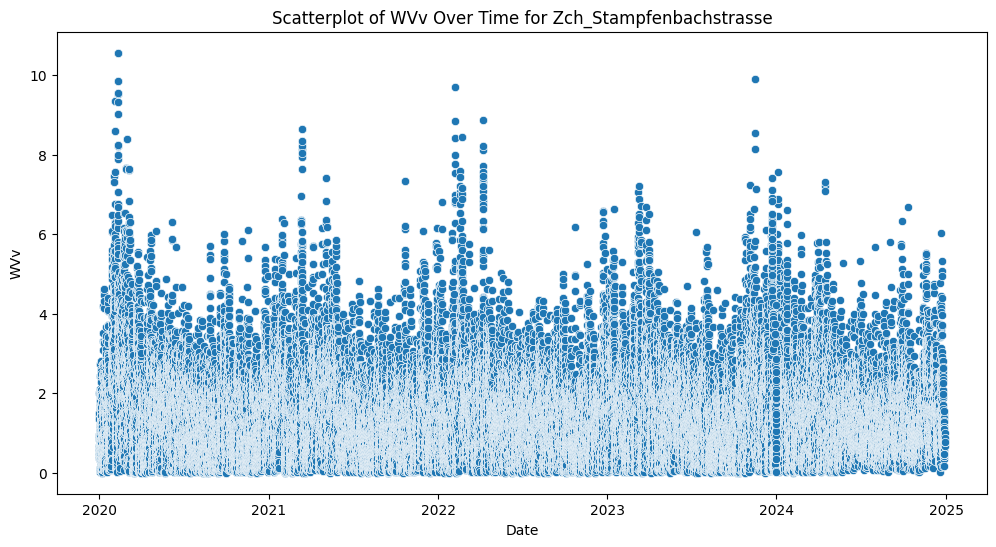

C:\Users\Natascha\AppData\Local\Temp\ipykernel_96232\3113523.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=location_data, x='Parameter', y='Wert', palette='Set3')


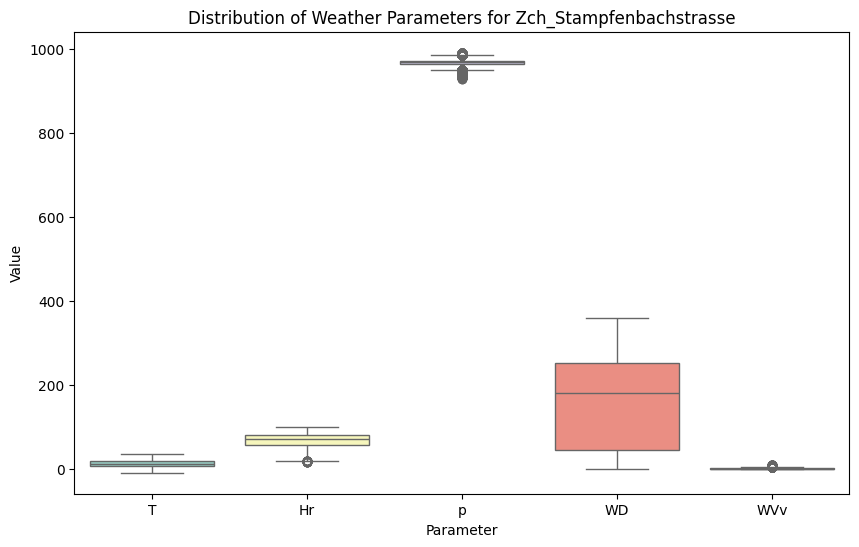

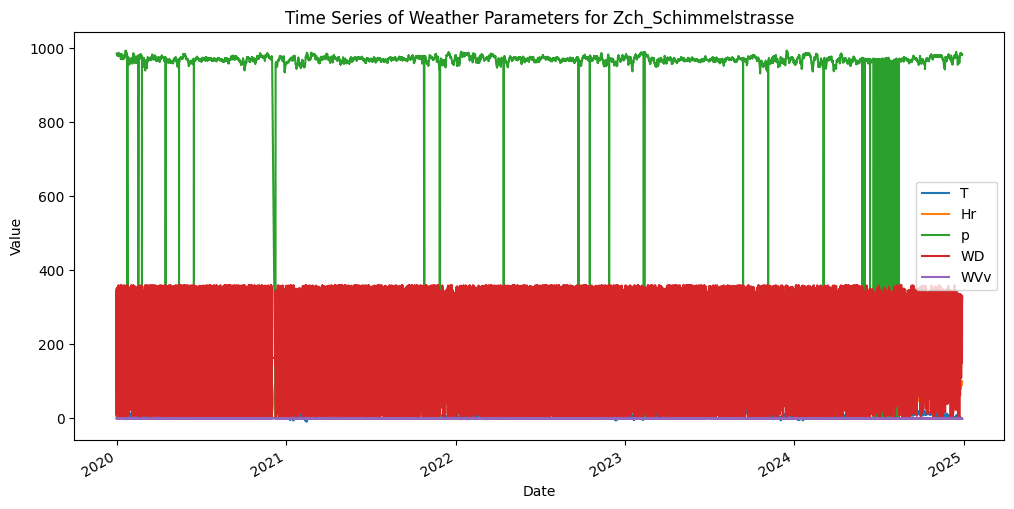

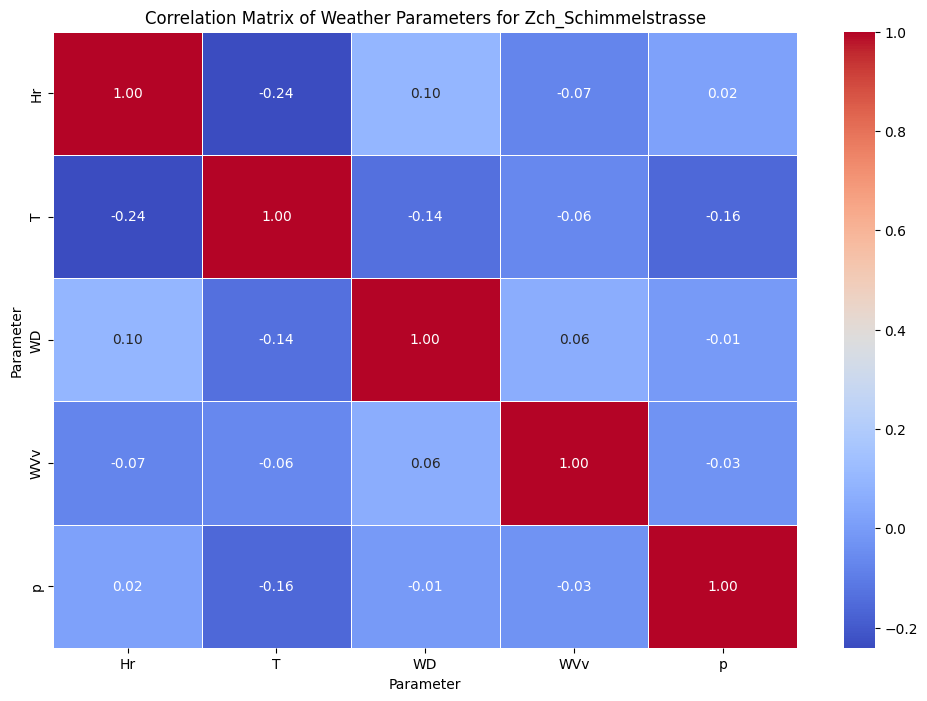

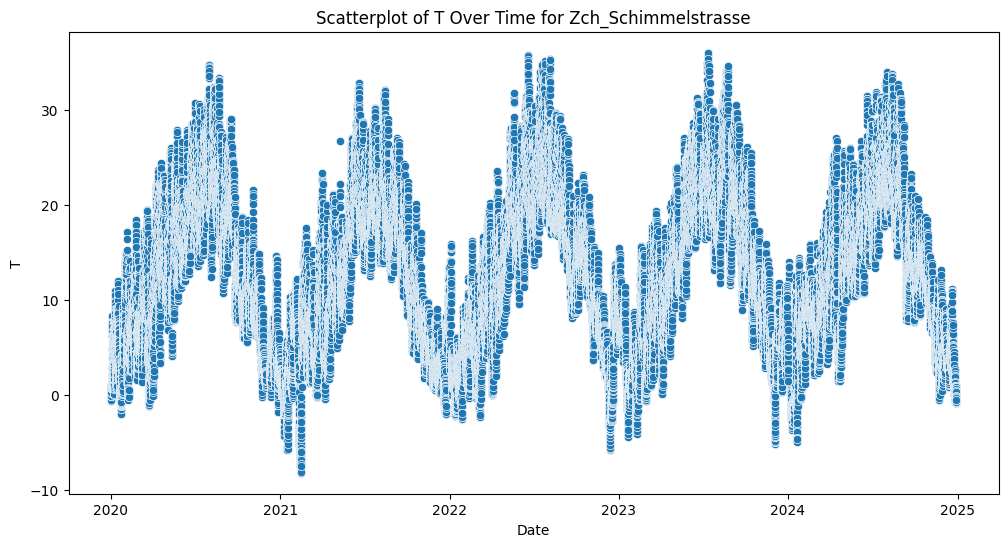

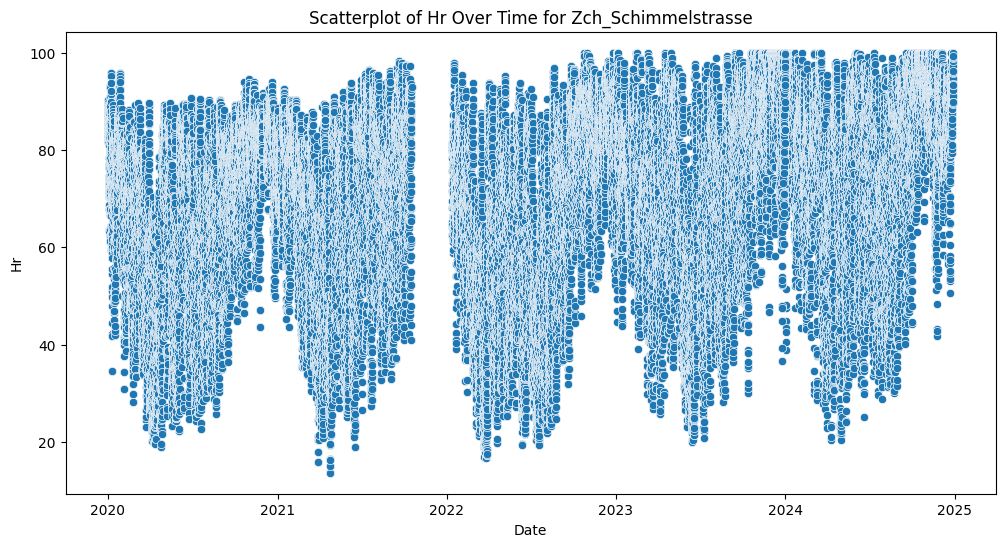

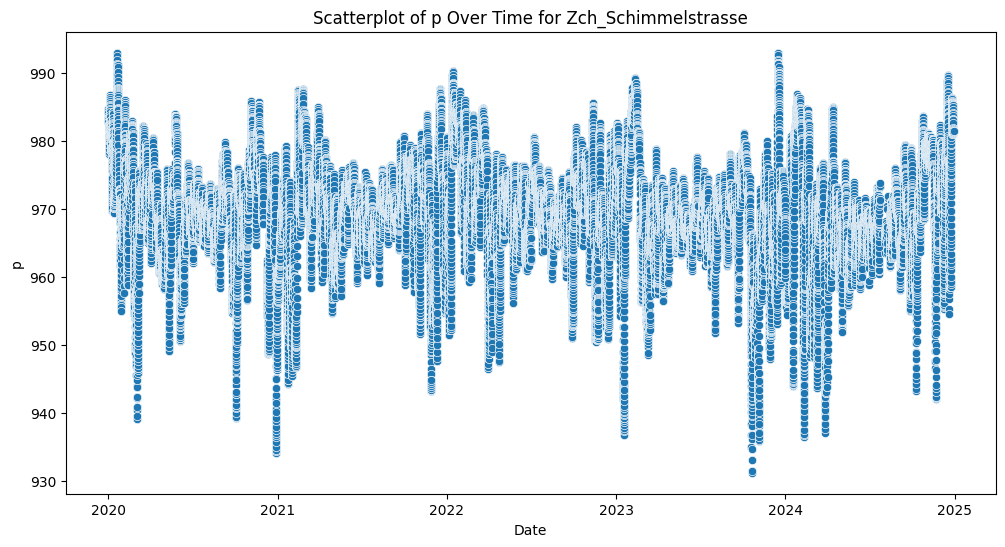

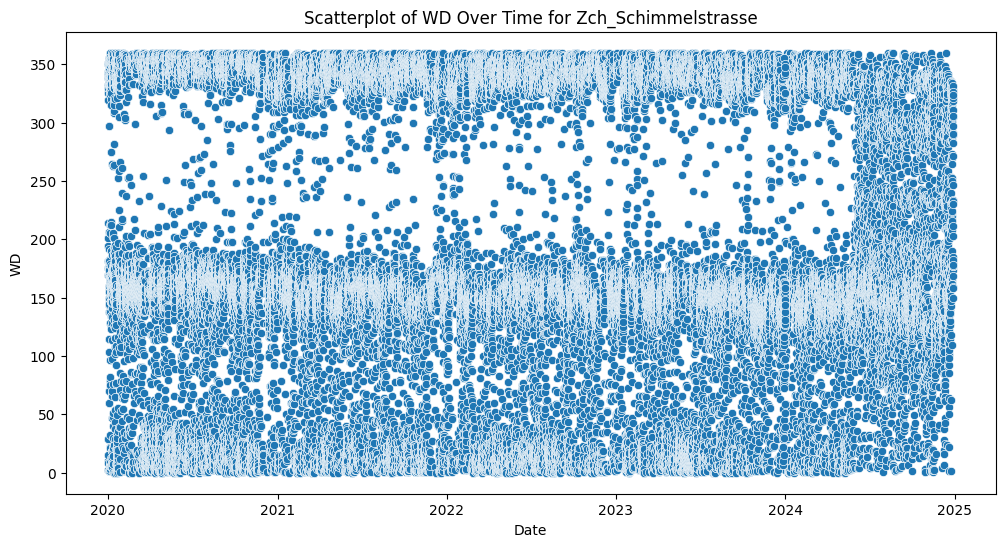

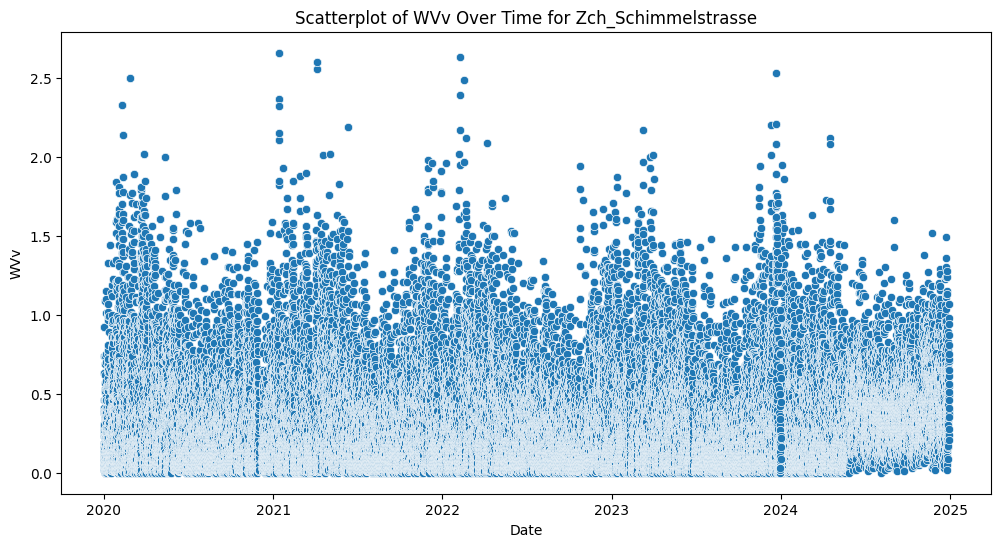

C:\Users\Natascha\AppData\Local\Temp\ipykernel_96232\3113523.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=location_data, x='Parameter', y='Wert', palette='Set3')


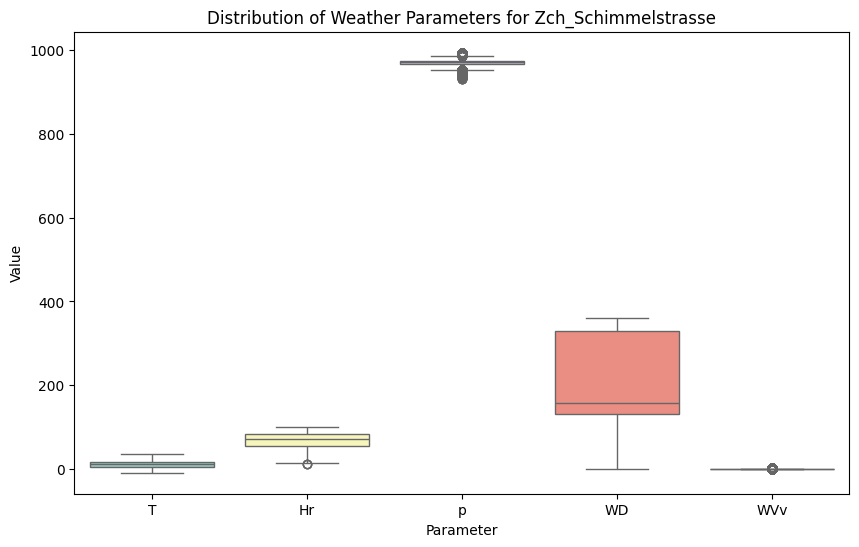

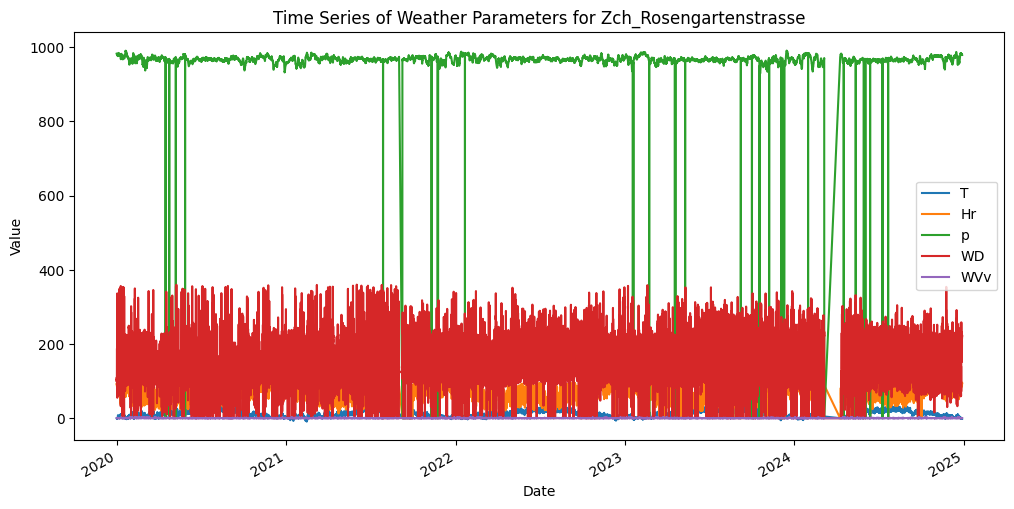

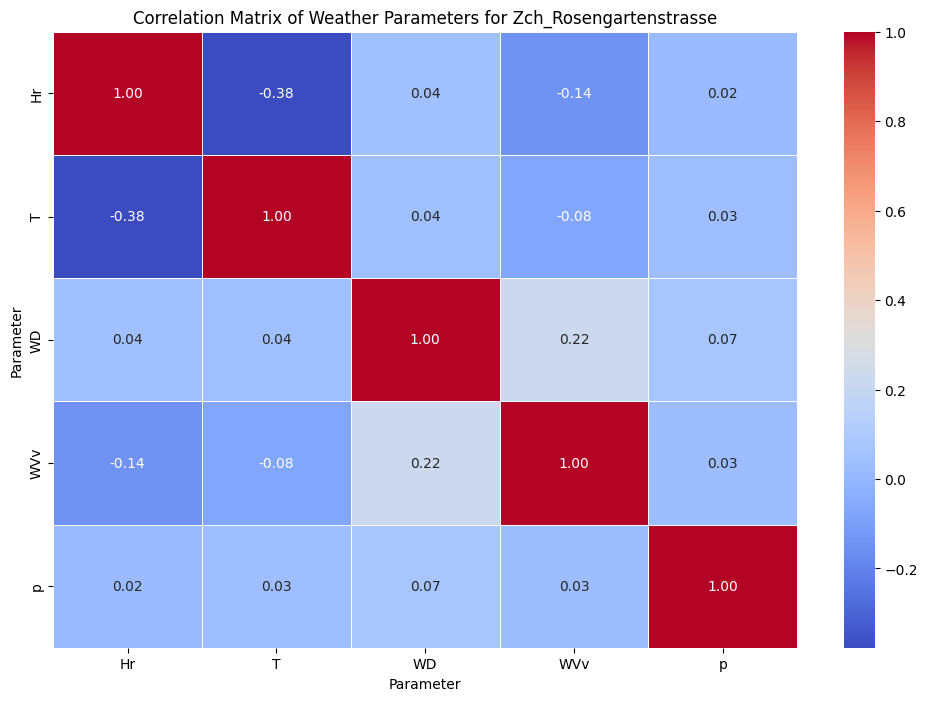

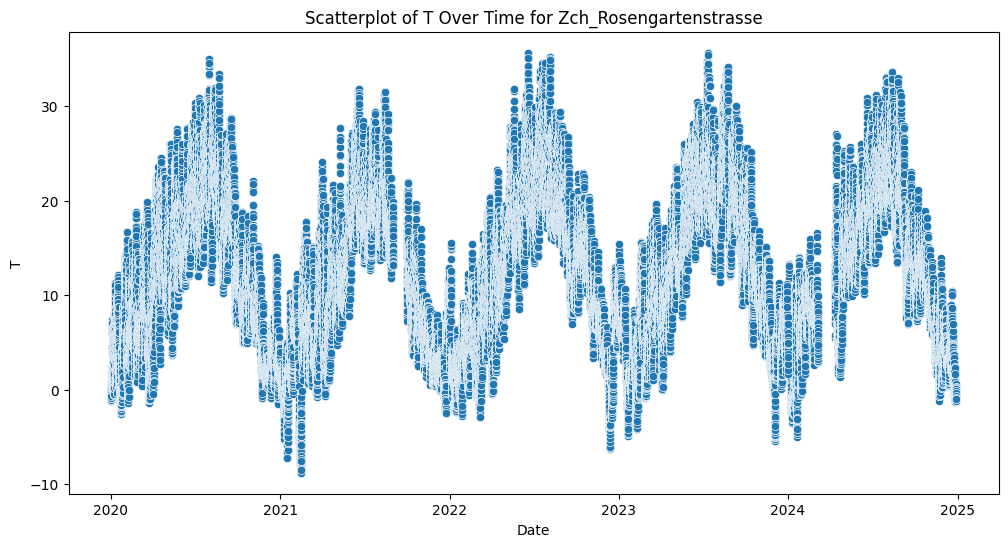

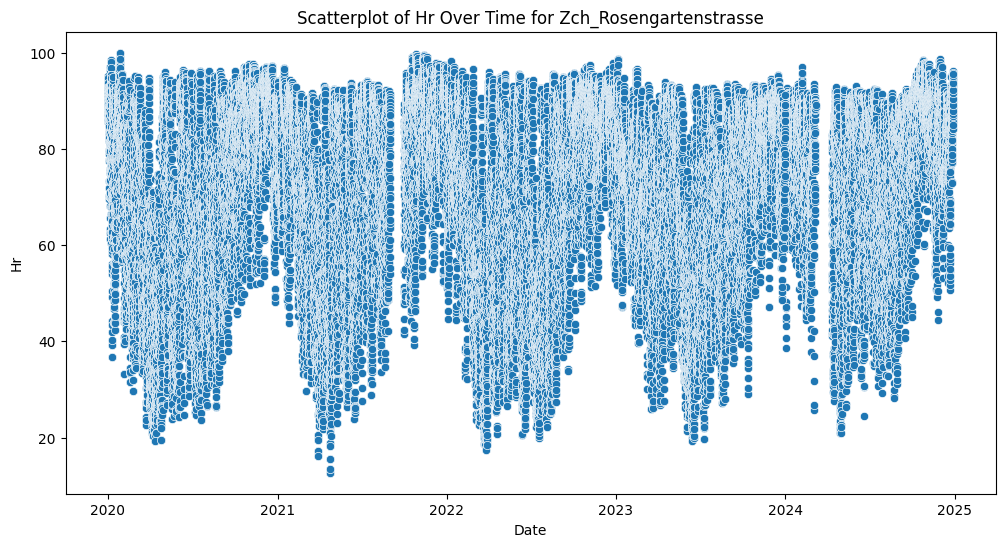

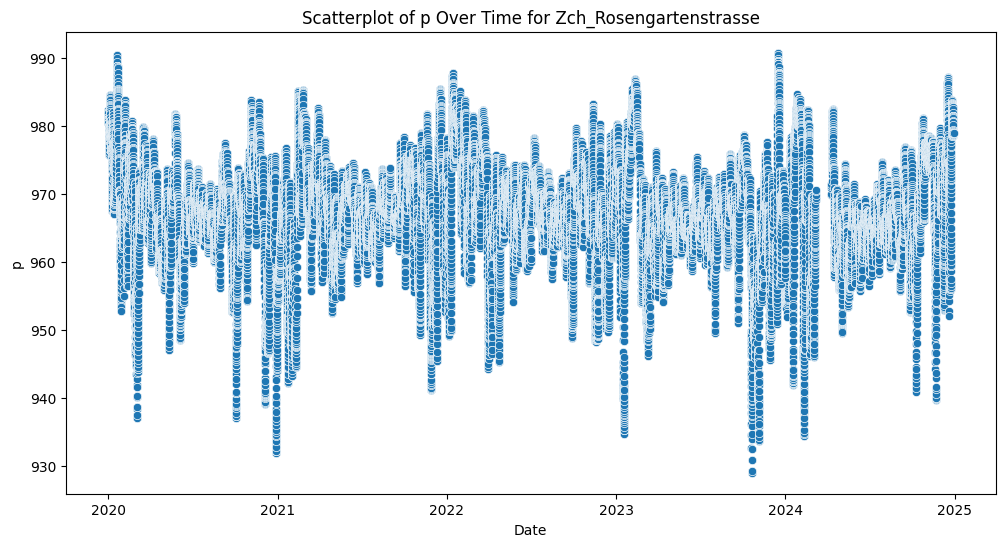

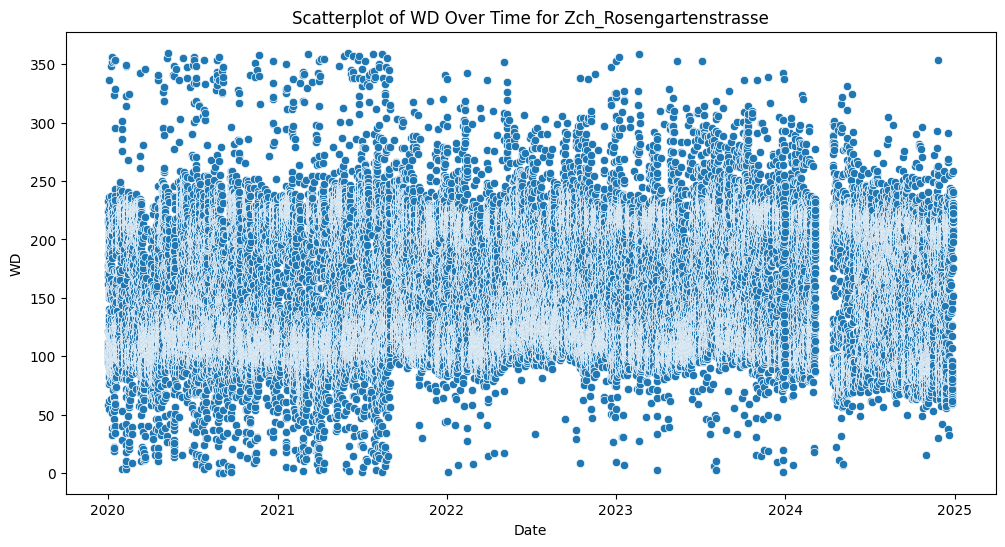

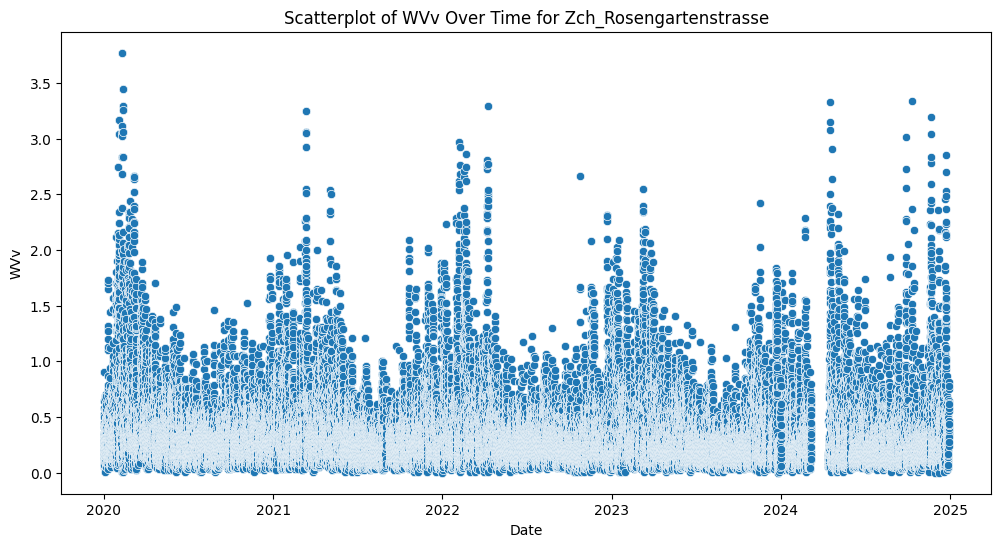

C:\Users\Natascha\AppData\Local\Temp\ipykernel_96232\3113523.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=location_data, x='Parameter', y='Wert', palette='Set3')


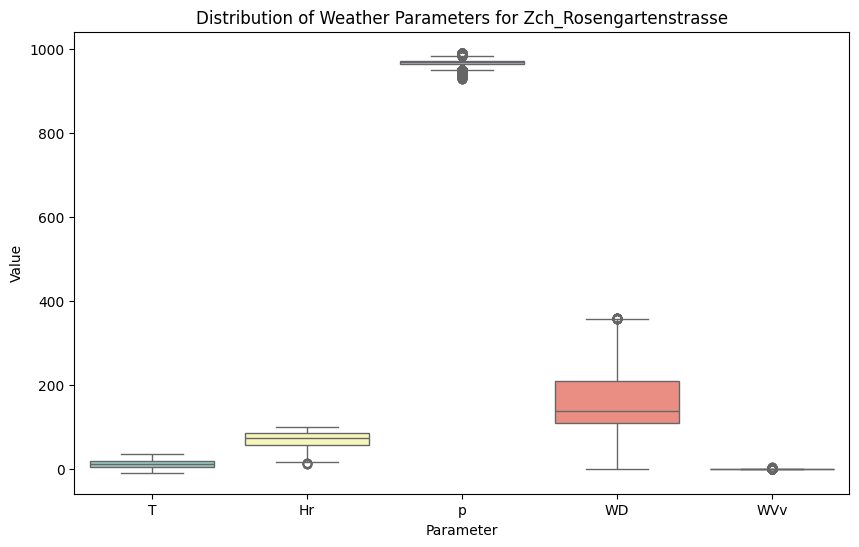

In [27]:
# Separate visualizations for each location
locations = all_data['Standort'].unique()
for location in locations:
    location_data = data_filtered[data_filtered['Standort'] == location]

    # Pivot the data for time series analysis
    pivoted_data = location_data.pivot_table(
        index='Datum', columns='Parameter', values='Wert', aggfunc='mean'
    )

    # Fill missing values in the pivoted data with 0
    pivoted_data = pivoted_data.fillna(0)

    # Time Series Visualization
    plt.figure(figsize=(12, 6))
    for parameter in parameters_of_interest:
        if parameter in pivoted_data.columns:
            pivoted_data[parameter].plot(label=parameter)
    plt.title(f'Time Series of Weather Parameters for {location}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Correlation Matrix
    correlation_matrix = pivoted_data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix of Weather Parameters for {location}')
    plt.show()

    # Scatterplots for Specific Parameters
    for parameter in parameters_of_interest:
        param_data = location_data[location_data['Parameter'] == parameter]
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=param_data, x='Datum', y='Wert')
        plt.title(f'Scatterplot of {parameter} Over Time for {location}')
        plt.xlabel('Date')
        plt.ylabel(parameter)
        plt.show()

    # Boxplot to Compare Distributions by Parameter
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=location_data, x='Parameter', y='Wert', palette='Set3')
    plt.title(f'Distribution of Weather Parameters for {location}')
    plt.xlabel('Parameter')
    plt.ylabel('Value')
    plt.show()

Parameters inlcuded 

T: Temperature (likely in degrees Celsius, based on typical conventions).

Hr: Relative humidity (percentage of moisture in the air).

p: Atmospheric pressure (likely in hectopascals, hPa).

WD: Wind direction (degrees, typically measured clockwise from north).

WVv: Wind velocity or speed (likely in meters per second or similar units).

StrGlo: Global solar radiation (shortwave radiation received from the sun, measured in watts per square meter, W/m²).